In [68]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,losses
from tensorflow.keras.datasets import fashion_mnist 
from tensorflow.keras.models import Model

In [69]:
(x_train, _),(x_test, _)= fashion_mnist.load_data()

In [70]:
x_train= x_train/255
x_test=x_test/255

In [71]:
x_train.shape

(60000, 28, 28)

In [72]:
x_test.shape

(10000, 28, 28)

In [75]:
latent_dim =64
class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder,self).__init__()
        self.latent_dim =latent_dim
        
        self.encoder =tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim,activation='relu')
            
        ])
        
        self.decoder = tf.keras.Sequential([
            layers.Dense(784, activation ='sigmoid'),
            layers.Reshape((28,28))
        ])
        
    def call(self,x):
            encoded =self.encoder(x)
            decoded =self.decoder(encoded)
            return decoded
autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [76]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 25s 7ms/step - loss: 0.0235 - val_loss: 0.0131
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0115 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0089 - val_loss: 0.0091
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.

In [78]:
encoded_imgs= autoencoder.encoder(x_test).numpy()
decoded_imgs= autoencoder.decoder(encoded_imgs).numpy()



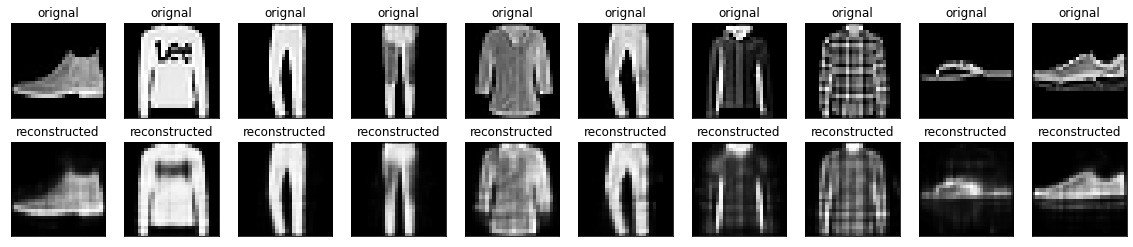

In [83]:
n=10

plt.figure(figsize=(20,4))

for i in range(n):
    
    ax=plt.subplot(2,n,i+1)
    plt.imshow(x_test[i])
    plt.title("orignal")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
    
    